**Colab Link**: https://colab.research.google.com/drive/1e41mZ0A8-4toXR7UuwWb6oBIp3JOD0I4#scrollTo=jp6qc6iCOhQl

**Context**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


**How can you help here?**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Dataset:**

Dataset Link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

**Column Profiling:**

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

**Concept Used:**

* Exploratory Data Analysis
* Linear Regression

**What does good looks like?**

* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
* Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
* Use Non-graphical and graphical analysis for getting inferences about variables.
  * This can be done by checking the distribution of variables of graduate applicants.
* Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
* Check correlation among independent variables and how they interact with each other.
* Use Linear Regression from (Statsmodel library) and explain the results.
* Test the assumptions of linear regression:
  * Multicollinearity check by VIF score
  * Mean of residuals
  * Linearity of variables (no pattern in residual plot)
  * Test for Homoscedasticity
  * Normality of residuals
* Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
* Provide actionable Insights & Recommendations
* Try out different Linear Regressions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as spy

In [ ]:
import warnings
warnings.simplefilter('ignore')

Importing the dataset and viewing the first 5 rows of data

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Let us view the bottom 5 rows of data

In [ ]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


A view of data type of each column in the dataset and the count of non-emplty rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Seems there are no missing values in the given dataset

shape of the loaded dataset

In [ ]:
df.shape

(500, 9)

Let us remove the feature 'Serial No.' as it is not useful for the analysis

In [ ]:
df.drop('Serial No.', axis = 1,inplace = True)

In [ ]:
df.shape

(500, 8)

columns present in the dataset

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Datatype of the columns

In [ ]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Looks like the data types for all features are well defined. There is no need to change the data types

unique entries present in each column

In [ ]:
for i in df.columns:
    print(f"Unique entries for column {i:<20} = {df[i].nunique()}")

Unique entries for column GRE Score            = 49
Unique entries for column TOEFL Score          = 29
Unique entries for column University Rating    = 5
Unique entries for column SOP                  = 9
Unique entries for column LOR                  = 9
Unique entries for column CGPA                 = 184
Unique entries for column Research             = 2
Unique entries for column Chance of Admit      = 61


Let us check the maximum values in columns that appear to be Float type

Checking if the data has Null values

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no Null values in the dataset

Data Description

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


No data with 'object' data types

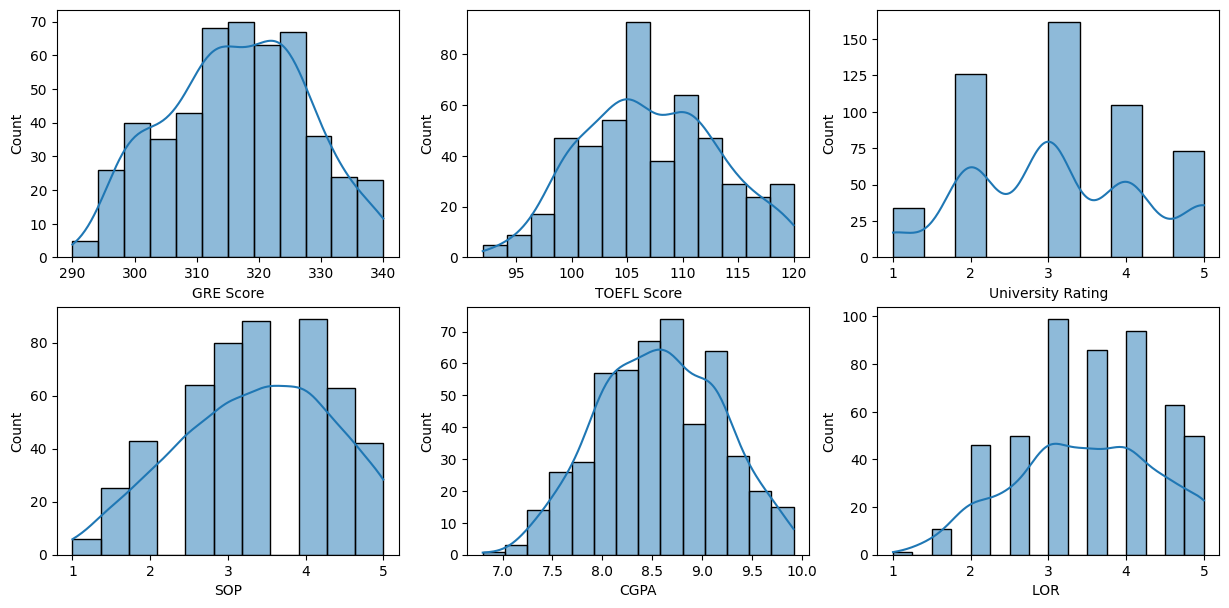

In [ ]:
cols = ['GRE Score','TOEFL Score','University Rating','SOP','CGPA','LOR ']
fig,axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
fig.subplots_adjust(top=1.2)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()

* Looks like 'GRE Score', 'TOELF Score', 'CGPA' are fairly normally distributed
* 'University Rating' is a discrete variable

In [ ]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '

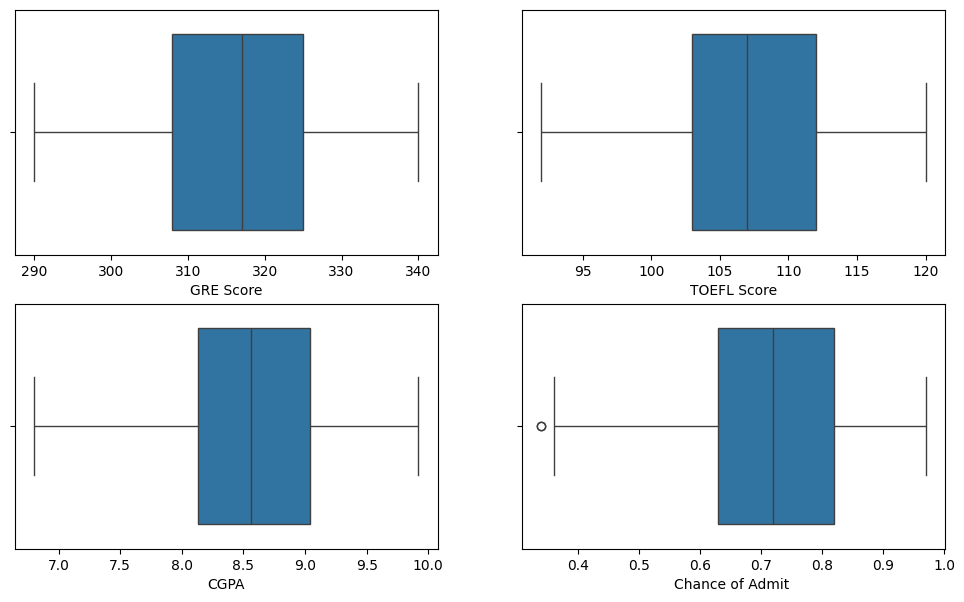

In [ ]:
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0,index])
    index += 1

sns.boxplot(x=num_cols[-1], data=df, ax=axs[1,0])
sns.boxplot(x=target, data=df, ax=axs[1,1])
plt.show()

* There are no outliers present in the dataset.

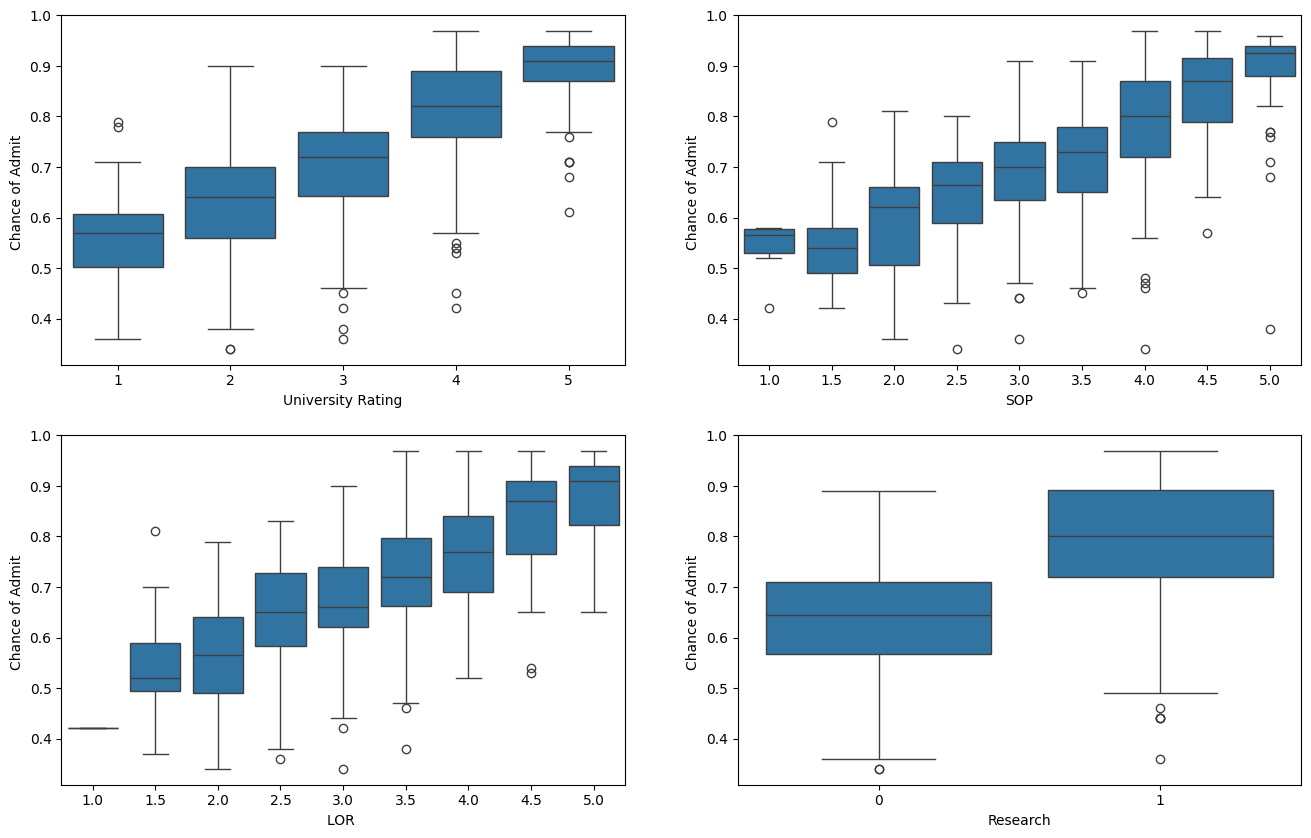

In [ ]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        index += 1

* As you can see from the graphs, as the rating increases the Chance of Admit also increases.
* Students who have the research experience have more chances of Admin as compared to other students who don't have the research experience.

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

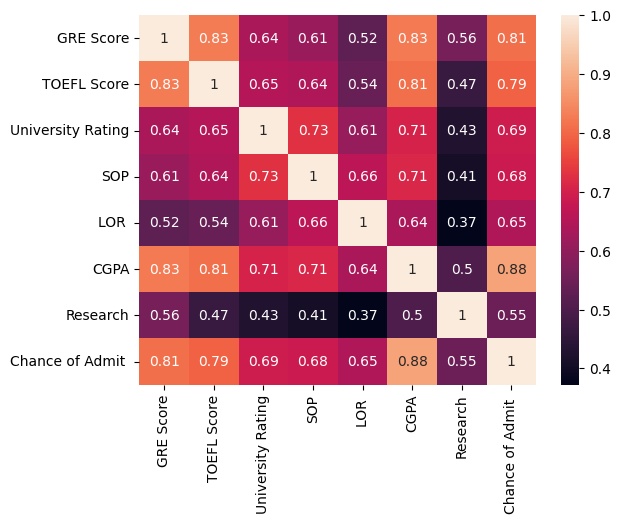

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

* High correlation is observed between
    * GRE Score - TOEFL Score
    * CGPA - GRE Score
    * CGPA - TOEFL Score
    * TOEFL Score - Chance of Admit
    * SOP - University Rating
    * CGPA - University Rating
    * CGPA - SOP
    * CGPA - Chance of Admit
    * GRE - Chance of Admit
    * TOEFL - Chance of Admit

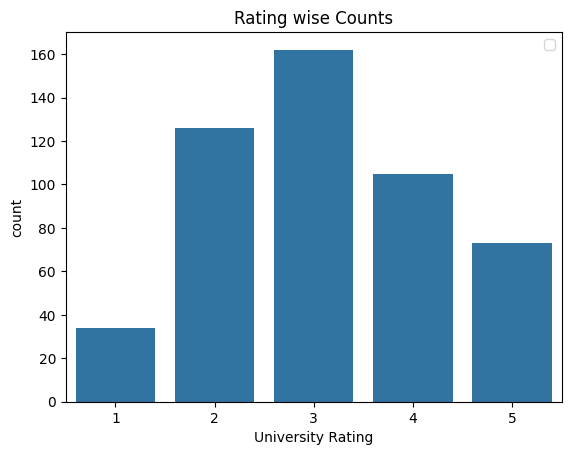

In [ ]:
sns.countplot(data = df, x = 'University Rating')
plt.title('Rating wise Counts')
plt.legend()
plt.show()

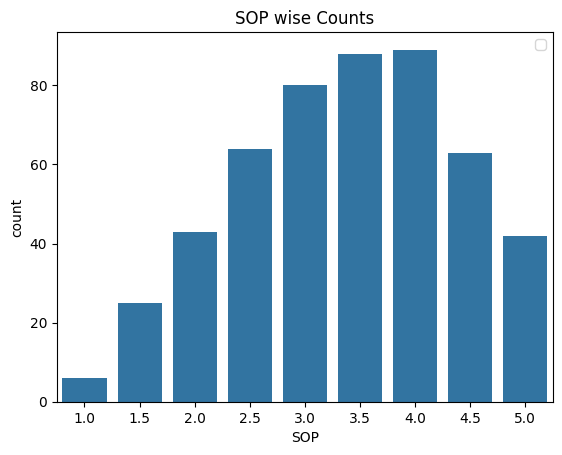

In [ ]:
sns.countplot(data = df, x = 'SOP')
plt.title('SOP wise Counts')
plt.legend()
plt.show()

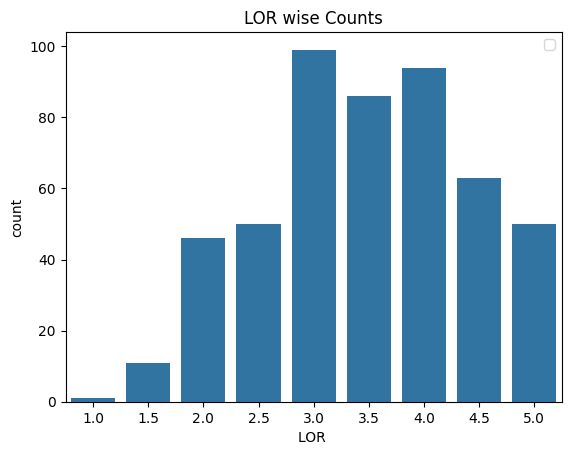

In [ ]:
sns.countplot(data = df, x = 'LOR ')
plt.title('LOR wise Counts')
plt.legend()
plt.show()

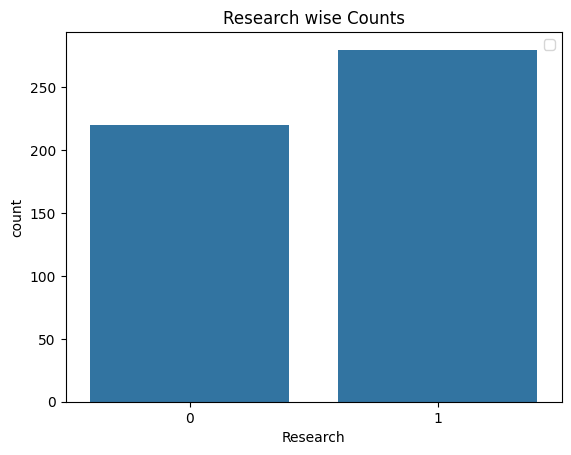

In [ ]:
sns.countplot(data = df, x = 'Research')
plt.title('Research wise Counts')
plt.legend()
plt.show()

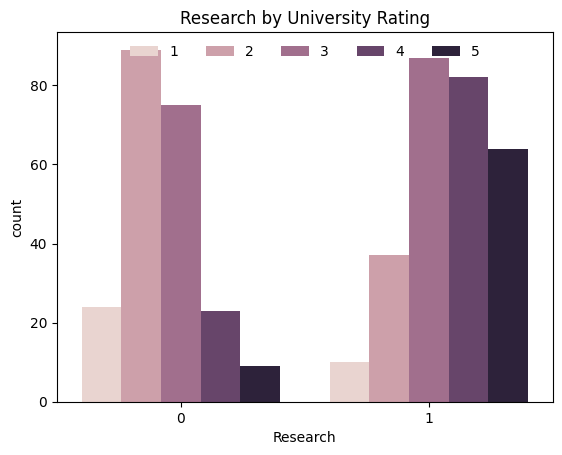

In [ ]:
sns.countplot(data = df, x = 'Research', hue = 'University Rating')
plt.title('Research by University Rating')
plt.legend(loc = 'upper center', ncol = 6, frameon = False)
plt.show()

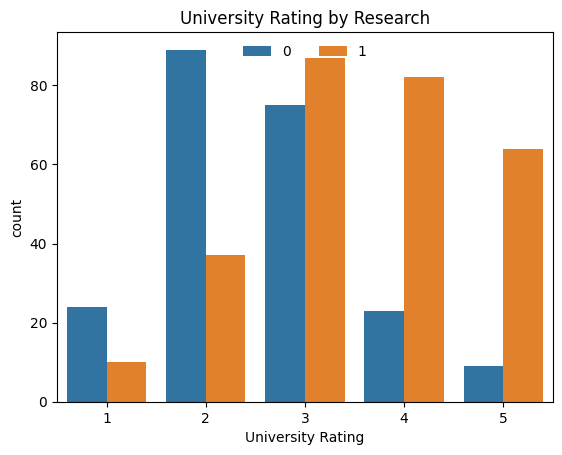

In [ ]:
sns.countplot(data = df, x = 'University Rating', hue = 'Research')
plt.title('University Rating by Research')
plt.legend(loc = 'upper center', ncol = 6, frameon = False)
plt.show()

* Universities with less ratings (1 and 2), there are many students without 'Research' experience
* Universities wth high ratings (3 and above), manjority of the students have 'Research' experience

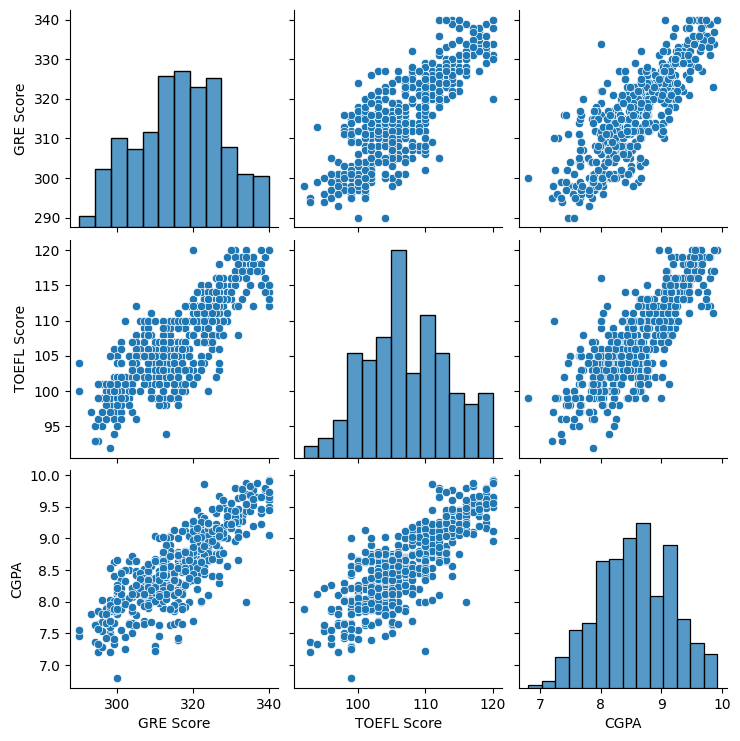

In [ ]:
sns.pairplot(data = df[num_cols])
plt.show()

* Independent continuous variables are also correlated with each other.

In [ ]:
pd.crosstab(df['Research'],df['University Rating'],normalize='all', margins=True)

University Rating,1,2,3,4,5,All
Research,,,,,,
0,0.048,0.178,0.150,0.046,0.018,0.44
1,0.020,0.074,0.174,0.164,0.128,0.56
All,0.068,0.252,0.324,0.210,0.146,1.00


* 56% of the students do Research

In [ ]:
df.groupby('Research')[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Chance of Admit ']].aggregate({'GRE Score':'mean','TOEFL Score':'mean','SOP':'mean','LOR ':'mean', 'CGPA':'mean','Chance of Admit ':'mean'})

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
Research,,,,,,
0,309.300000,103.990909,2.918182,3.095455,8.234727,0.634909
1,322.107143,109.707143,3.732143,3.789286,8.844929,0.789964


* Clearly, Students with 'Research' experience has an advantage of getting chance of admission

In [ ]:
df.groupby('University Rating')[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Chance of Admit ']].aggregate({'GRE Score':'mean','TOEFL Score':'mean','SOP':'mean','LOR ':'mean', 'CGPA':'mean','Chance of Admit ':'mean'})

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
University Rating,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.888082


* Students with high 'University Rating', good CGPA and good in scores have better chance of getting admission

# Model Building

#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline


In [ ]:
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

X.shape, y.shape

((500, 7), (500,))

In [ ]:
# Random data points are split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((400, 7), (400,))

In [ ]:
X_test.shape, y_test.shape

((100, 7), (100,))

In [ ]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


In [ ]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1


In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.62,0.678571,0.50,0.625,0.714286,0.650641,1.0
1,0.52,0.678571,0.75,0.750,1.000000,0.557692,0.0
2,0.26,0.357143,0.50,0.625,0.428571,0.544872,0.0
3,0.48,0.535714,0.25,0.375,0.714286,0.471154,0.0
4,0.36,0.500000,0.50,0.625,0.285714,0.451923,1.0


In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.88,0.857143,0.75,0.750,0.571429,0.878205,1.0
1,0.48,0.571429,0.75,0.875,0.714286,0.717949,1.0
2,0.50,0.464286,0.25,0.250,0.285714,0.272436,0.0
3,0.44,0.607143,0.50,0.500,0.428571,0.605769,0.0
4,0.72,0.714286,0.50,0.625,0.428571,0.721154,1.0


In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
LR.coef_.round(3)

array([0.122, 0.084, 0.01 , 0.007, 0.06 , 0.351, 0.024])

In [ ]:
LR.intercept_.round(3)

0.356

Now the equation can be written as

(0.122 * GRE Score) + (0.084 * TOEFL Score) + (0.01 * University Rating) + (0.007 * SOP) + (0.06 * LOR) + (0.351 * CGPA) + (0.024 * Research) + (0.356)

In [ ]:
LR.score(X_train, y_train)

0.8210671369321554

In [ ]:
LR.score(X_test, y_test)

0.8188432567829629

* Train and Test scores are very close
* That means there is no Overfitting
* But there is scope to improve the R2 score

# Polynomial Regression

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.drop('Serial No.', axis = 1,inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Random data points are split.
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

X.shape, y.shape

((500, 7), (500,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Defining a function for Adjusted R2

In [ ]:
def adjusted_r_squared(r_squared,X_values,y_values):
  """
  Calculates the adjusted R-squared value for a linear regression model.

  Args:
    X: The independent variable array.
    y: The dependent variable array.
    r_squared: The R-squared value.

  Returns:
    The adjusted R-squared value.
  """
  n = len(y)
  p = X.shape[1]
  return 1 - (((1 - r_squared) * (n - 1)) / (n - p - 1))

In [ ]:
degrees = 10
train_scores_poly = []
test_scores_poly = []

Adj_train_scores_poly = []
Adj_test_scores_poly = []

for i in range(1, degrees):

    # creates polynomial feature
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Applying MinmaxScaler
    scaler = MinMaxScaler()
    X_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    # Training Model
    LR_poly = LinearRegression()
    LR_poly.fit(X_poly_scaled, y_train)

    # Storing R2 scores
    train_scores_poly.append(LR_poly.score(X_poly_scaled, y_train))
    test_scores_poly.append(LR_poly.score(X_test_poly_scaled, y_test))

    # Calculating performance
    Adj_train_score = adjusted_r_squared(LR_poly.score(X_poly_scaled,y_train) , X_poly_scaled, y_train)
    Adj_test_score = adjusted_r_squared(LR_poly.score(X_test_poly_scaled,y_test) , X_test_poly_scaled, y_test)

    # Storing Adj R2 scores
    Adj_train_scores_poly.append(Adj_train_score)
    Adj_test_scores_poly.append(Adj_test_score)

In [ ]:
Adj_train_scores_poly

[0.8185213441649299,
 0.8334600629708357,
 0.8709133938798167,
 0.9639075541939417,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
Adj_test_scores_poly

[0.816265823444509,
 0.824043223733544,
 0.6389797782314383,
 -11.107302661820976,
 -285.41267549860873,
 -387.017026318322,
 -336.0203924936111,
 -310.2941394932327,
 -305.04879070382907]

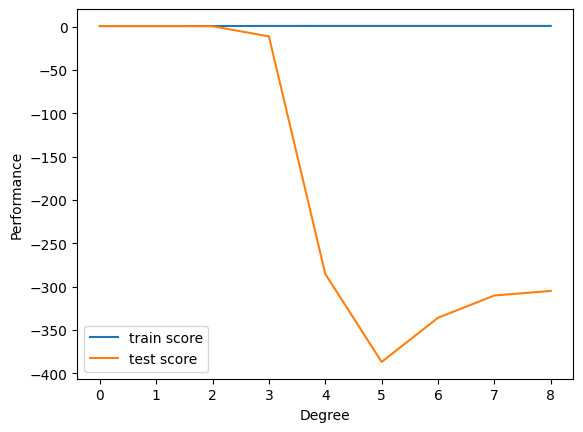

In [ ]:
plt.plot(Adj_train_scores_poly, label="train score")
plt.plot(Adj_test_scores_poly, label="test score")
plt.xlabel("Degree")
plt.ylabel("Performance")
plt.legend()
plt.show()

Finding out at which place we get the maximum test accuracy

In [ ]:
np.argmax(Adj_test_scores_poly)

1

Therefore, polynomial function with degree 2 gives the best accuracy

# Polynomial Features + Ridge Regression + K-Fold Cross Validationt

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.drop('Serial No.', axis = 1,inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Random data points are split.
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']
X.shape, y.shape

((500, 7), (500,))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
# Performing k-fold cross validation
degrees = 10 # number of degrees
train_scores = []
val_scores = []

In [ ]:
for d in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model = make_pipeline(PolynomialFeatures(d), MinMaxScaler(), Ridge(alpha=0.01))
        model.fit(X_train, y_train) #training model

        train_score = adjusted_r_squared(model.score(X_train, y_train), X_train, y_train)
        val_score= adjusted_r_squared(model.score(X_val, y_val),X_val, y_val)

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

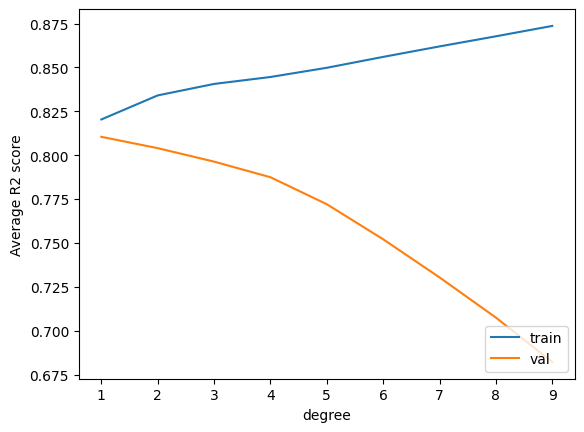

In [ ]:
plt.figure()
plt.plot(list(range(1, 10)), train_scores, label="train")
plt.plot(list(range(1, 10)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()


In [ ]:
val_scores

[0.8104652600055514,
 0.8040197652336442,
 0.7963431984930385,
 0.7874431803061395,
 0.7720730947368797,
 0.7520978597391649,
 0.7303884246708795,
 0.7074738696931666,
 0.6822144294792767]

In [ ]:
np.argmax(val_scores)

0

* As the degree increases, training score is also increasing
* Validation score is maximum (81.04%) at degree = 1
* But there is no much difference in the validation score for degree 2 and so on
* To keep the model simple with limited number of polynomial features, we will go with degree = 1

# Hyperparameter Tuning

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.drop('Serial No.', axis = 1,inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Random data points are split.
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

X.shape, y.shape

((500, 7), (500,))

In [ ]:
#0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
X_train.shape

(300, 7)

In [ ]:
X_val.shape

(100, 7)

In [ ]:
X_test.shape

(100, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

In [ ]:
train_scores = []
val_scores = []

lambda_list = np.arange(0.01, 10, 0.1) # [0.01, 0.1, 1, 5, 10]

for rate in lambda_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(1), MinMaxScaler(), Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  train_score = adjusted_r_squared(polyreg_scaled.score(X_train, y_train), X_train, y_train)
  val_score= adjusted_r_squared(polyreg_scaled.score(X_val, y_val),X_val, y_val)

  train_scores.append(train_score)
  val_scores.append(val_score)

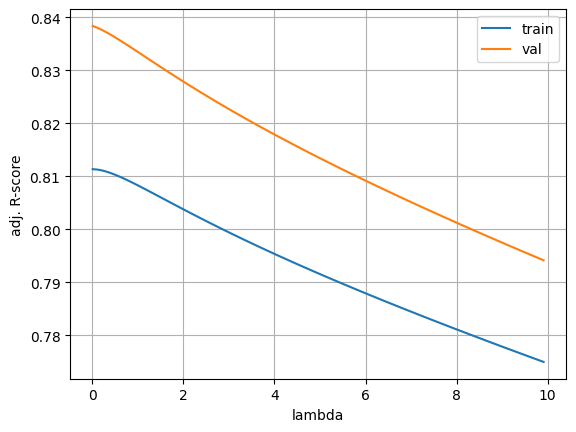

In [ ]:
plt.figure()
plt.plot(lambda_list, train_scores, label="train")
plt.plot(lambda_list, val_scores, label="val")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

Finding the best 'lambda' value

In [ ]:
lambda_list[np.argmax(val_scores)]

0.01

In [ ]:
final_model = make_pipeline(PolynomialFeatures(1), StandardScaler(), Ridge(alpha=0.01))

final_model.fit(X_train, y_train)


train_score = adjusted_r_squared(final_model.score(X_train, y_train), X_train, y_train)
print(f'Training Score = {train_score}')

val_score = adjusted_r_squared(final_model.score(X_val, y_val),X_val, y_val)
print(f'Validation Score = {val_score}')

test_score = adjusted_r_squared(final_model.score(X_test, y_test),X_test, y_test)
print(f'Test Score = {test_score}')

Training Score = 0.8113209754393007
Validation Score = 0.8383829288186876
Test Score = 0.8121670057046841


# Linear Regression using Stats Models

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.drop('Serial No.', axis = 1,inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Random data points are split.
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

X.shape, y.shape

((500, 7), (500,))

In [ ]:
# Random data points are split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Statmodels default is without intercept, to add intercept we need to add constant.
X_sm = sm.add_constant(X_train)

In [ ]:
sm_model = sm.OLS(y_train, X_sm)
results = sm_model.fit()


# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          3.41e-142
Time:                        16:23:53   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4214      0.12

* R2 Score     = 0.821
* Adj R2 Score = 0.818

In [ ]:
# Predict using the fitted model
y_pred = results.predict(X_sm)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0035265554784557574
Mean Absolute Error (MAE): 0.042533340611643176
Root Mean Squared Error (RMSE): 0.059384808482100516


The provided values for Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) indicate that the model performs well in terms of predicting the target variable. Let's break down each metric:

**Mean Squared Error (MSE):** 0.0035 represents a very low value, indicating that on average, the squared differences between the predicted and actual values are very small. This suggests good overall accuracy in fitting the model to the data.

**Mean Absolute Error (MAE):** 0.0425 signifies that the average absolute difference between the predicted and actual values is around 0.0425. This metric is less sensitive to outliers compared to MSE, and a value this low suggests good model performance.

**Root Mean Squared Error (RMSE):** 0.0594 is the square root of MSE, and it provides a measure of the standard deviation of the errors. A value close to 0 indicates that the distribution of errors is tightly centered around zero, implying good model fit.

**Interpretation:** Considering all three metrics together, the model seems to be making accurate predictions with small errors.

# Assumptions for Linear Regression

**1. Linearity**

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

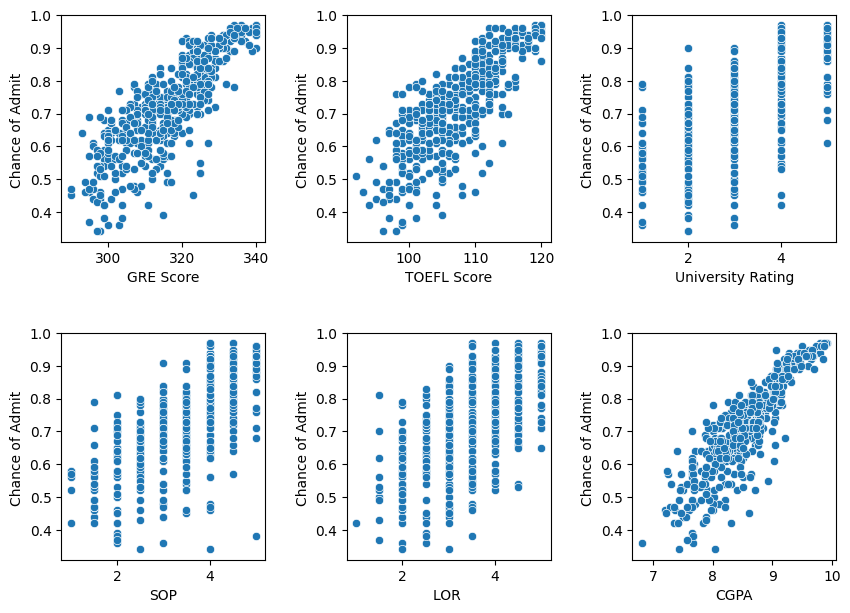

In [ ]:
cols = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
fig.subplots_adjust(top=1.2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=cols[index], y='Chance of Admit ', ax=axis[row, col])
        index += 1
plt.show()

* The independent variables 'GRE Score', 'TOEFL Score' and 'CGPA' are seem to form an accurately linear shape
* 'University Rating' and 'Research Experience'variable is discrete in nature
* 'SOP' and 'LOR' does not form a linear shape with target variable
* A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc

**2. Mean of Residuals**

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

We calculated that MAE = 0.0425, Very close to zero so all good here.

**3. Homoscedasticity**

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.


---



Detecting heteroscedasticity!

Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

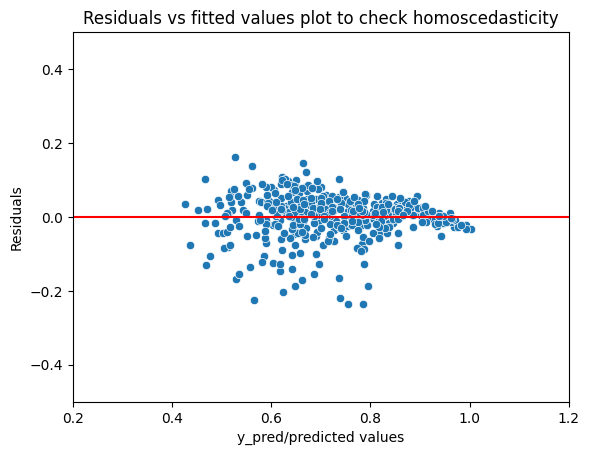

In [ ]:
residuals = y_train - y_pred
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0.2, 1.2)
p = plt.axhline(y=0,color='red',linestyle='-' )
p = plt.title('Residuals vs fitted values plot to check homoscedasticity')

* The variance of residuals is consistent from the above graph

Now we will be applying tests.

A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.

**Goldfeld Quandt Test**

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9506855620801064), ('p-value', 0.6371346713321009)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.

**Bartlett’s Test**

Tests the null hypothesis that all input samples are from populations with equal variances.

In [ ]:
from scipy.stats import bartlett
for i in X_train.columns:
    test = bartlett(X_train[i],residuals)
    print(i,":",test)


GRE Score : BartlettResult(statistic=3605.985735015679, pvalue=0.0)
TOEFL Score : BartlettResult(statistic=3137.23322966302, pvalue=0.0)
University Rating : BartlettResult(statistic=1807.7680516394018, pvalue=0.0)
SOP : BartlettResult(statistic=1689.5849942856025, pvalue=0.0)
LOR  : BartlettResult(statistic=1635.2519732191095, pvalue=0.0)
CGPA : BartlettResult(statistic=1299.4572694207961, pvalue=1.4830804125041296e-284)
Research : BartlettResult(statistic=1152.0761374080535, pvalue=1.5873354452714936e-252)


When 'p' values are quite less than 0.05 in Bartlett Test, it's null hypothesis that error terms are homoscedastic gets rejected, that's not good for a regression.

**4. Normality of Residuals**

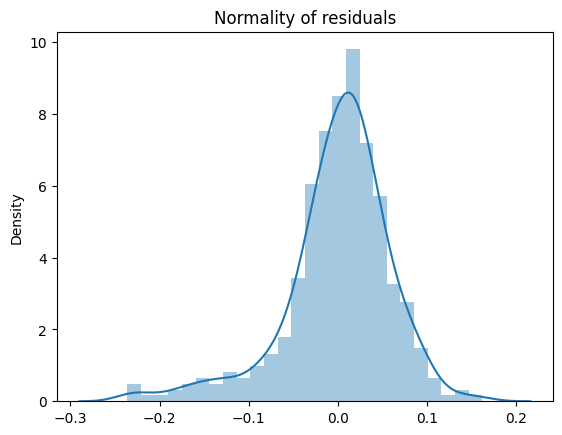

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of residuals')

The residual terms are pretty much normally distributed for the number of test points we took. The central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

**Shapiro-Wilk Test for Normality**

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(residuals)

# Print the test statistic and p-value
print(f"Shapiro-Wilk test statistic: {stat}")
print(f"p-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Fail to reject the null hypothesis of normality.")
else:
    print("Reject the null hypothesis, indicating non-normality.")


Shapiro-Wilk test statistic: 0.9291010499000549
p-value: 7.73526370994454e-13
Reject the null hypothesis, indicating non-normality.


* Though the p-value indicated non-normality
* But the Shapiro-Wilk test statistic is very close to 1, indicates more is the normality

**Q-Q Plots**

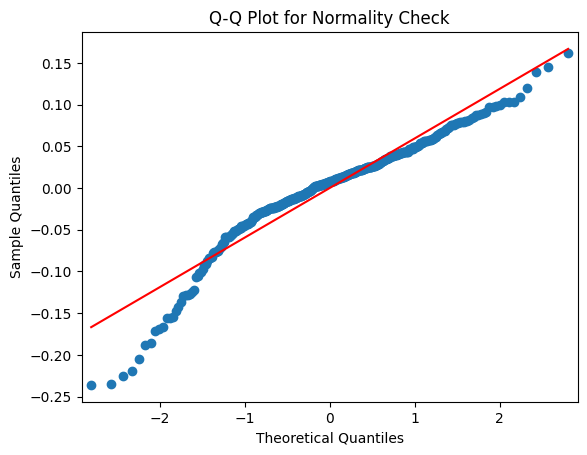

In [ ]:
# import numpy as np
#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Create the Q-Q plot
fig, ax = plt.subplots()
qqplot(residuals, line='s', ax=ax)  # 's' adds a standardized line for reference
plt.title("Q-Q Plot for Normality Check")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


* Normality: If the points closely follow the straight line, especially in the middle region, it suggests normality.
* Departures from normality: Deviations from the line, especially in the tails, indicate potential non-normality.

**5. No autocorrelation of Residuals**

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

There should not be autocorrelation in the data so the error terms should not form any pattern.

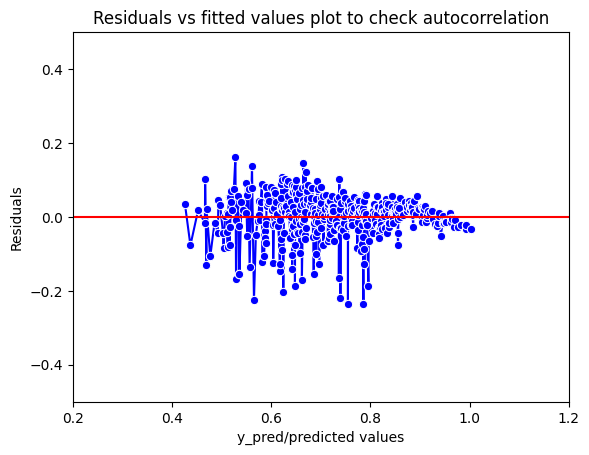

In [ ]:
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0.2,1.2)
p = plt.axhline(y=0,color='red',linestyle='-' )
p = plt.title('Residuals vs fitted values plot to check autocorrelation')

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

* Null Hypothesis: Autocorrelation is absent.
* Alternative Hypothesis: Autocorrelation is present.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_stat = durbin_watson(residuals)

# Print the Durbin-Watson statistic
print(f"Durbin-Watson statistic: {dw_stat}")

# Interpretation
if dw_stat < 1.5:
    print("Positive autocorrelation is likely present.")
elif dw_stat > 2.5:
    print("Negative autocorrelation is likely present.")
else:
    print("No significant evidence of autocorrelation.")


Durbin-Watson statistic: 2.0495529015329965
No significant evidence of autocorrelation.


**5. No Multicollinearity**

This assumption states that the independent variables are not highly correlated with each other. This means that the information they provide is not redundant. Multicollinearity can lead to unstable and unreliable estimates of the regression coefficients. Checking for multicollinearity involves inspecting correlation matrices and using techniques like Variance Inflation Factor (VIF).

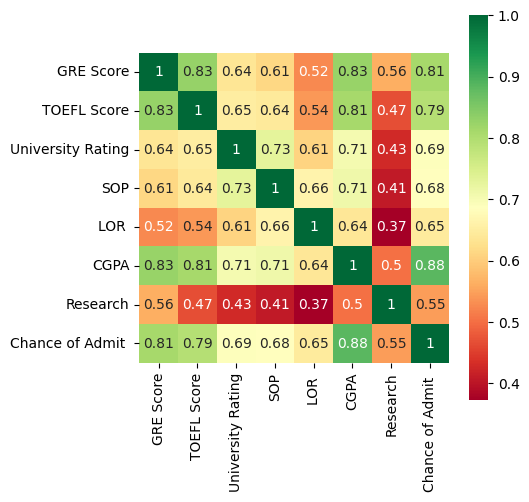

In [ ]:
plt.figure(figsize=(5,5))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_t = pd.DataFrame(X_sm, columns=df.columns[:-1])
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,1284.07
1,TOEFL Score,1141.17
5,CGPA,933.06
3,SOP,34.84
4,LOR,30.25
2,University Rating,20.41
6,Research,2.82


'GRE Score' seems to have very high VIF, lets drop this feature

In [ ]:
X_t.drop(columns = ['GRE Score'], inplace = True)

In [ ]:
X_t.head()

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,111,3,3.5,4.0,8.83,1
433,111,4,4.0,5.0,8.54,0
19,102,3,3.5,3.0,8.50,0
322,107,2,2.5,4.0,8.27,0
332,106,3,3.5,2.5,8.21,1


In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,CGPA,692.35
0,TOEFL Score,605.60
2,SOP,32.92
3,LOR,30.01
1,University Rating,19.39
5,Research,2.82


* 'CGPA' now has high VIF, but it should not be dropped
* As it is Cumulative score
* Lets drop TOEFL Score

In [ ]:
X_t.drop(columns = ['TOEFL Score'], inplace = True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,SOP,32.82
2,LOR,29.63
3,CGPA,25.25
0,University Rating,19.33
4,Research,2.80


Now lets fit the model once again and see the results

In [ ]:
sm_model = sm.OLS(y_train, X_t)
results = sm_model.fit()


# statstical summary of the model
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              7709.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        16:23:55   Log-Likelihood:                          472.31
No. Observations:                 400   AIC:                                     -934.6
Df Residuals:                     395   BIC:                                     -914.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

* Post removing the variables that caused high VIF, we can now see that the Adjusted R2 score is about 0.99

# Insights
* Multicollinearity is present in the data.
* After removing collinear features there are only 5 variables which are important in making predictions for the target variables.
* Indepedent variables are linearly correlated with dependent variables.

# Recommendations

* CGPA and Research are the two variables which are important in making the prediction for Chance of Admit.
* CGPA is the most important varibale in making the prediction for the Chance of Admit.
* Following are the final model results on the test data:
    * R2_score: 0.99
    * Adjusted_R2: 0.99